# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LassoCV,RidgeCV,ElasticNetCV,ElasticNet,Ridge,Lasso
from sklearn.model_selection import cross_val_score,KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from tqdm import tqdm

Mounted at /content/drive


# Data Cleaning

source: https://www.kaggle.com/datasets/joelljungstrom/128k-airline-reviews

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/AirlineReviews.csv')
df

,Aircraft,AirlineName,CabinType,DateFlown,DatePub,EntertainmentRating,FoodRating,GroundServiceRating,OriginCountry,OverallScore,...,Route,SeatComfortRating,ServiceRating,Slug,Title,TravelType,TripVerified,ValueRating,WifiRating,unique_id
0,NaN,AB Aviation,Economy Class,November 2019,11th November 2019,0,4,4,Netherlands,9.0,...,Moroni to Moheli,4,5,ab-aviation,pretty decent airline,Solo Leisure,Trip Verified,3,0,d3b260fb-268b-4399-8a9b-2804825902c6
1,E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Moroni to Anjouan,2,2,ab-aviation,Not a good airline,Solo Leisure,Trip Verified,2,0,307711df-268f-4698-97b8-45729b7d972e
2,Embraer E120,AB Aviation,Economy Class,June 2019,25th June 2019,0,1,1,UnitedKingdom,1.0,...,Anjouan to Dzaoudzi,2,1,ab-aviation,flight was fortunately short,Solo Leisure,Trip Verified,2,0,82bd2602-171d-4724-bde0-90b71621cdcf
3,NaN,Aerocaribbean,Economy Class,NaN,31st December 2010,0,0,0,Denmark,8.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,4,0,a927beb4-6244-4f5c-9dc3-09890aa3e616
4,NaN,Aerocaribbean,NaN,NaN,25th November 2010,0,0,0,UnitedKingdom,1.0,...,NaN,0,0,aerocaribbean,Aerocaribbean customer review,NaN,NaN,0,0,d7bea425-c58a-4a7e-8269-02e0e6516633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129450,NaN,Wizz Air,Economy Class,NaN,15th July 2010,0,0,0,UnitedKingdom,NaN,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,1,0,7889c410-59a0-4a11-9af6-a100c5ebb03e
129451,NaN,Wizz Air,Economy Class,NaN,23rd June 2010,0,0,0,Belgium,8.0,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,4,0,dc7700d9-69e3-4296-93a5-0a550e8b8a80
129452,NaN,Wizz Air,Economy Class,NaN,19th June 2010,0,0,0,Ireland,NaN,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,1,0,6de9ac64-a533-4dc8-b555-a16cc13554f7
129453,NaN,Wizz Air,Economy Class,NaN,16th June 2010,0,0,0,CzechRepublic,5.0,...,NaN,0,0,wizz-air,Wizz Air customer review,NaN,NaN,4,0,52ad5aa9-88f6-4eb1-99fe-e7fa64223792


In [ ]:
df.describe()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,SeatComfortRating,ServiceRating,ValueRating,WifiRating
count,129455.000000,129455.000000,129455.000000,125124.000000,129455.000000,129455.000000,129455.000000,129455.000000
mean,1.557190,1.989077,1.652010,4.556408,2.470202,2.689622,2.637527,0.453926
std,1.751076,1.774512,1.740252,3.498833,1.620262,1.774499,1.628808,1.078274
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,2.000000,0.000000
75%,3.000000,4.000000,3.000000,8.000000,4.000000,4.000000,4.000000,0.000000
max,5.000000,5.000000,5.000000,10.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Aircraft             36424 non-null   object 
 1   AirlineName          129455 non-null  object 
 2   CabinType            126437 non-null  object 
 3   DateFlown            90993 non-null   object 
 4   DatePub              129455 non-null  object 
 5   EntertainmentRating  129455 non-null  int64  
 6   FoodRating           129455 non-null  int64  
 7   GroundServiceRating  129455 non-null  int64  
 8   OriginCountry        127777 non-null  object 
 9   OverallScore         125124 non-null  float64
 10  Recommended          129455 non-null  object 
 11  Review               128631 non-null  object 
 12  Route                90825 non-null   object 
 13  SeatComfortRating    129455 non-null  int64  
 14  ServiceRating        129455 non-null  int64  
 15  Slug             

In [ ]:
for column in df.select_dtypes(include='object').columns:
    print(f"Unique values in {column}: {df[column].nunique()}\n"+'-'*20)

Unique values in Aircraft: 3633
--------------------
Unique values in AirlineName: 547
--------------------
Unique values in CabinType: 4
--------------------
Unique values in DateFlown: 111
--------------------
Unique values in DatePub: 5200
--------------------
Unique values in OriginCountry: 202
--------------------
Unique values in Recommended: 2
--------------------
Unique values in Review: 128425
--------------------
Unique values in Route: 51401
--------------------
Unique values in Slug: 548
--------------------
Unique values in Title: 70975
--------------------
Unique values in TravelType: 4
--------------------
Unique values in TripVerified: 6
--------------------
Unique values in unique_id: 129455
--------------------


In [ ]:
drop_cols = [
    'Aircraft',
    'AirlineName',
    'DateFlown',
    'DatePub',
    'OriginCountry',
    'Review',
    'Route',
    'Slug',
    'Title',
    'unique_id',
    'TripVerified'
]

df_clean = df.drop(drop_cols,axis=1)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CabinType            126437 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   SeatComfortRating    129455 non-null  int64  
 7   ServiceRating        129455 non-null  int64  
 8   TravelType           91146 non-null   object 
 9   ValueRating          129455 non-null  int64  
 10  WifiRating           129455 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 10.9+ MB


In [ ]:
for c in df_clean.columns:
  print(f'Column {c} vals\n{df[c].value_counts()}')
  print('-'*20)

Column CabinType vals
Economy Class      102735
Business Class      16474
Premium Economy      4816
First Class          2412
Name: CabinType, dtype: int64
--------------------
Column EntertainmentRating vals
0    54120
1    26973
4    14071
3    13327
5    12140
2     8824
Name: EntertainmentRating, dtype: int64
--------------------
Column FoodRating vals
0    36314
1    29679
4    18044
3    16937
5    15956
2    12525
Name: FoodRating, dtype: int64
--------------------
Column GroundServiceRating vals
1    42536
0    41649
5    15527
4    12323
3     9558
2     7862
Name: GroundServiceRating, dtype: int64
--------------------
Column OverallScore vals
1.0     44070
10.0    14582
9.0     12512
2.0     12228
8.0     11754
3.0      7769
7.0      7589
5.0      5396
4.0      4812
6.0      4412
Name: OverallScore, dtype: int64
--------------------
Column Recommended vals
no     77597
yes    51858
Name: Recommended, dtype: int64
--------------------
Column SeatComfortRating vals
1    34079
4

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129455 entries, 0 to 129454
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CabinType            126437 non-null  object 
 1   EntertainmentRating  129455 non-null  int64  
 2   FoodRating           129455 non-null  int64  
 3   GroundServiceRating  129455 non-null  int64  
 4   OverallScore         125124 non-null  float64
 5   Recommended          129455 non-null  object 
 6   SeatComfortRating    129455 non-null  int64  
 7   ServiceRating        129455 non-null  int64  
 8   TravelType           91146 non-null   object 
 9   ValueRating          129455 non-null  int64  
 10  WifiRating           129455 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 10.9+ MB


In [ ]:
for c in df_clean.select_dtypes(include='object').columns:
  print(c)
  print(df[c].value_counts())
  print(df[c].unique())
  print(df[c].isna().sum())
  print('-'*20)

CabinType
Economy Class      102735
Business Class      16474
Premium Economy      4816
First Class          2412
Name: CabinType, dtype: int64
['Economy Class' nan 'Business Class' 'First Class' 'Premium Economy']
3018
--------------------
Recommended
no     77597
yes    51858
Name: Recommended, dtype: int64
['yes' 'no']
0
--------------------
TravelType
Solo Leisure      33246
Couple Leisure    23845
Family Leisure    19900
Business          14155
Name: TravelType, dtype: int64
['Solo Leisure' nan 'Business' 'Couple Leisure' 'Family Leisure']
38309
--------------------


In [ ]:
df_clean['CabinType'] = df_clean['CabinType'].fillna('Economy Class')
df_clean['Recommended'] = df_clean['Recommended'].replace({'yes':1,'no':0}).astype(int)

In [ ]:
categorical_cols = df_clean.select_dtypes(include='object').columns
dummies = pd.get_dummies(df_clean[categorical_cols],prefix=categorical_cols)
df_clean = pd.concat([df_clean,dummies],axis=1)
df_clean

,CabinType,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,TravelType,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,Economy Class,0,4,4,9.0,1,4,5,Solo Leisure,3,0,0,1,0,0,0,0,0,1
1,Economy Class,0,1,1,1.0,0,2,2,Solo Leisure,2,0,0,1,0,0,0,0,0,1
2,Economy Class,0,1,1,1.0,0,2,1,Solo Leisure,2,0,0,1,0,0,0,0,0,1
3,Economy Class,0,0,0,8.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0
4,Economy Class,0,0,0,1.0,0,0,0,NaN,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129450,Economy Class,0,0,0,NaN,0,0,0,NaN,1,0,0,1,0,0,0,0,0,0
129451,Economy Class,0,0,0,8.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0
129452,Economy Class,0,0,0,NaN,0,0,0,NaN,1,0,0,1,0,0,0,0,0,0
129453,Economy Class,0,0,0,5.0,1,0,0,NaN,4,0,0,1,0,0,0,0,0,0


In [ ]:
df_final = df_clean.dropna(how='any').drop(categorical_cols,axis=1)
df_final

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,0,4,4,9.0,1,4,5,3,0,0,1,0,0,0,0,0,1
1,0,1,1,1.0,0,2,2,2,0,0,1,0,0,0,0,0,1
2,0,1,1,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
6,0,1,1,2.0,0,1,3,1,0,0,1,0,0,1,0,0,0
7,0,0,5,9.0,1,4,4,4,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129200,0,0,2,8.0,1,1,1,5,0,0,1,0,0,0,0,0,1
129201,1,1,1,1.0,0,1,2,1,1,0,1,0,0,0,0,1,0
129202,0,0,2,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
129203,0,0,1,1.0,0,2,2,1,0,0,1,0,0,0,1,0,0


In [ ]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91145 entries, 0 to 129204
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   EntertainmentRating        91145 non-null  int64  
 1   FoodRating                 91145 non-null  int64  
 2   GroundServiceRating        91145 non-null  int64  
 3   OverallScore               91145 non-null  float64
 4   Recommended                91145 non-null  int64  
 5   SeatComfortRating          91145 non-null  int64  
 6   ServiceRating              91145 non-null  int64  
 7   ValueRating                91145 non-null  int64  
 8   WifiRating                 91145 non-null  int64  
 9   CabinType_Business Class   91145 non-null  uint8  
 10  CabinType_Economy Class    91145 non-null  uint8  
 11  CabinType_First Class      91145 non-null  uint8  
 12  CabinType_Premium Economy  91145 non-null  uint8  
 13  TravelType_Business        91145 non-null  ui

In [ ]:
df_final.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/clean_rating.csv')

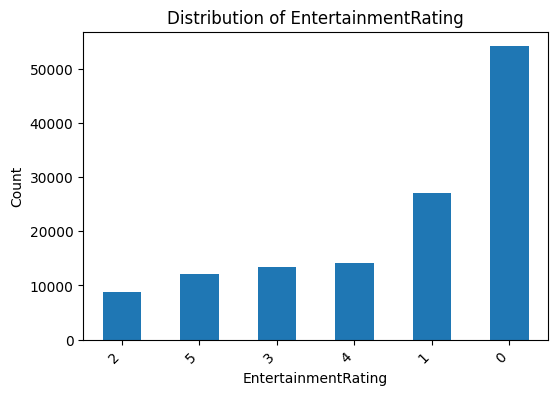

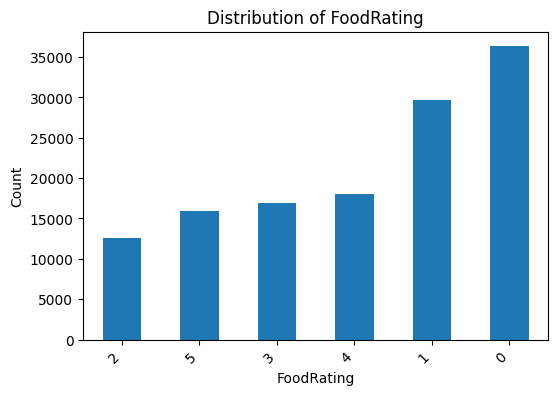

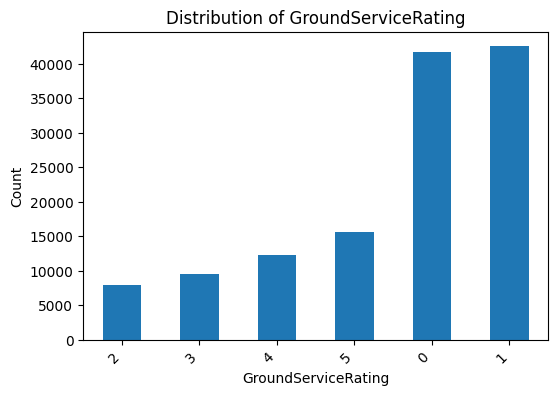

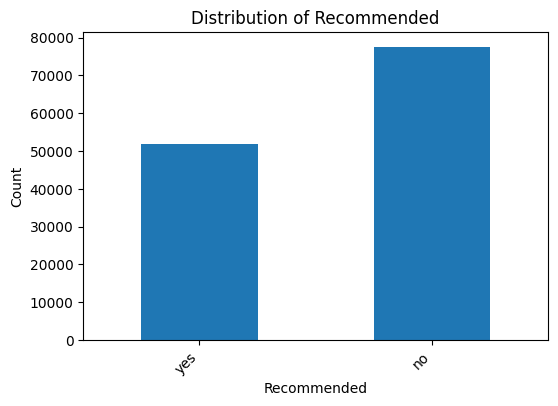

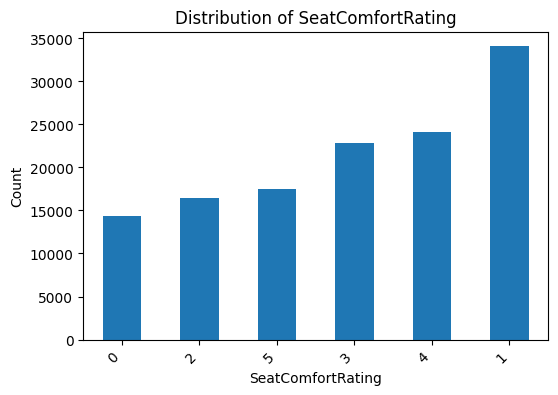

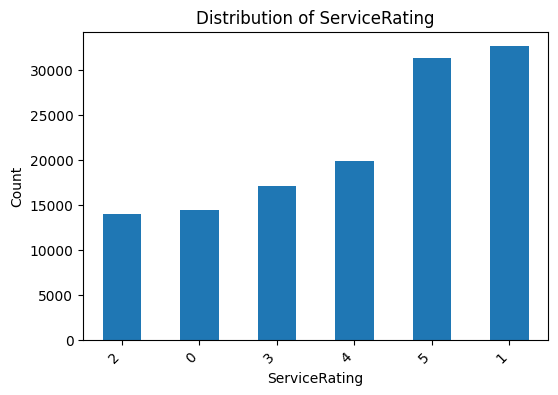

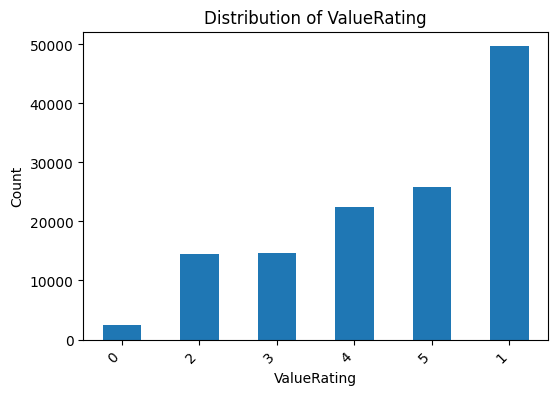

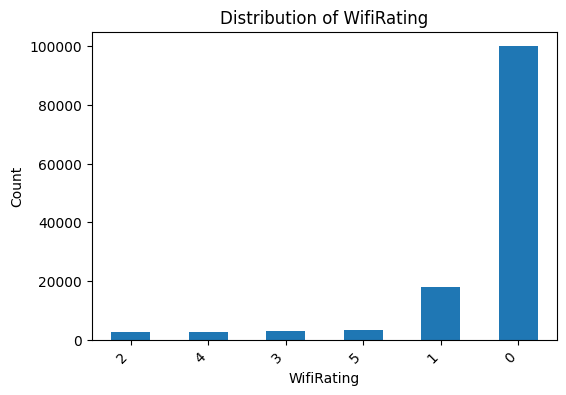

In [ ]:
for column in df_final.columns:
    if df_final[column].dtype == 'uint8' or column =='OverallScore':
        continue
    plt.figure(figsize=(6, 4))
    plt.title(f'Distribution of {column}')
    df[column].value_counts().sort_values().plot(kind='bar')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

<ipython-input-16-dfb31dd6ed44>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


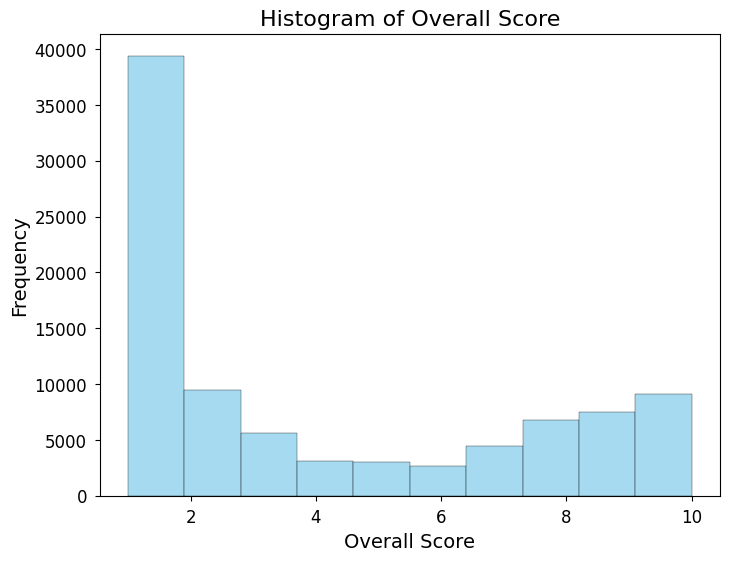

In [ ]:
plt.figure(figsize=(8, 6))  # Set the figure size
plt.style.use('seaborn-paper')
sns.histplot(data=df_final, x='OverallScore', bins=10, color='skyblue')
plt.xlabel('Overall Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.title('Histogram of Overall Score', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# Prediction Models

## Train test split

In [ ]:
ratings = pd.read_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/clean_rating.csv',index_col=0)
ratings.head()

,EntertainmentRating,FoodRating,GroundServiceRating,OverallScore,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure
0,0,4,4,9.0,1,4,5,3,0,0,1,0,0,0,0,0,1
1,0,1,1,1.0,0,2,2,2,0,0,1,0,0,0,0,0,1
2,0,1,1,1.0,0,2,1,2,0,0,1,0,0,0,0,0,1
6,0,1,1,2.0,0,1,3,1,0,0,1,0,0,1,0,0,0
7,0,0,5,9.0,1,4,4,4,0,0,1,0,0,0,0,0,1


In [ ]:
X = ratings.drop(['OverallScore'],axis=1)
y = ratings['OverallScore']

# train_ratio = 0.75
# validation_ratio = 0.15
# test_ratio = 0.10

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 476)

# X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio),random_state=476)

In [ ]:
train = pd.concat([X_train,y_train],axis=1)
train.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/train.csv')
train


,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,OverallScore
119690,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,2.0
11498,1,1,3,0,2,1,1,1,0,1,0,0,0,0,0,1,1.0
67138,0,4,5,1,5,5,5,0,0,1,0,0,0,0,1,0,10.0
113027,0,0,2,1,3,1,4,0,0,1,0,0,0,0,0,1,5.0
36223,1,1,1,0,1,2,1,1,0,1,0,0,0,0,1,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124876,0,0,3,0,3,1,2,0,0,1,0,0,1,0,0,0,2.0
125418,0,4,4,1,4,5,4,0,0,1,0,0,0,0,0,1,8.0
21034,4,4,4,1,3,4,4,3,0,1,0,0,0,0,1,0,7.0
115159,1,1,2,0,1,1,1,1,0,1,0,0,1,0,0,0,1.0


In [ ]:
test = pd.concat([X_test,y_test],axis=1)
test.to_csv('/content/drive/MyDrive/MLBA/BA476 Project/airline rating/test.csv')
test

,EntertainmentRating,FoodRating,GroundServiceRating,Recommended,SeatComfortRating,ServiceRating,ValueRating,WifiRating,CabinType_Business Class,CabinType_Economy Class,CabinType_First Class,CabinType_Premium Economy,TravelType_Business,TravelType_Couple Leisure,TravelType_Family Leisure,TravelType_Solo Leisure,OverallScore
35707,0,0,4,1,5,5,5,0,0,1,0,0,0,0,0,1,9.0
17040,1,1,3,0,1,2,3,1,0,1,0,0,0,1,0,0,5.0
28846,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1.0
65393,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,0,1.0
13764,0,4,4,1,4,5,4,0,0,1,0,0,0,1,0,0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,4,4,5,1,3,4,5,0,0,1,0,0,0,1,0,0,7.0
128846,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1.0
111475,0,1,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1.0
36473,0,1,3,0,2,1,2,1,0,1,0,0,0,0,0,1,3.0


In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

X_train_std.shape,X_test_std.shape,y_train.shape,y_test.shape

((72916, 16), (18229, 16), (72916,), (18229,))

In [ ]:
yhat = y_train.mean()
mean_squared_error(y_test,[yhat]*len(y_test))

11.834853648041328

## Linear Regression

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)  # Degree Adjustment
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_poly, y_train)


yhat_train = lr.predict(X_train_poly)
yhat_test = lr.predict(X_test_poly)


mse_train = mean_squared_error(y_train, yhat_train)
mse_test = mean_squared_error(y_test, yhat_test)

print("MSE on training data:", mse_train)
print("MSE on testing data:", mse_test)

MSE on training data: 0.784318049452494
MSE on testing data: 0.8834342830070423


In [ ]:
cv_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
np.mean(cv_lr)

-1.021644916164869

In [ ]:
len(lr.coef_)

4845

### Lasso

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
alphas = np.logspace(-3, 7, num=10)

lasso_cv = LassoCV(alphas=alphas, random_state=476, cv=5)

# Fit LassoCV on the training data
lasso_cv.fit(X_train_std, y_train)

# Predict on training and test data
yhat_train_lasso = lasso_cv.predict(X_train_std)
yhat_test_lasso = lasso_cv.predict(X_test_std)

# Calculate the mean squared error on training and test sets
mse_train_lasso = mean_squared_error(y_train, yhat_train_lasso)
mse_test_lasso = mean_squared_error(y_test, yhat_test_lasso)

print(f"Best alpha: {lasso_cv.alpha_}")

print(f"Coefficients: {lasso_cv.coef_}")

Best alpha: 0.001
Coefficients: [ 0.00938679  0.1667706   0.56211855  1.38185795  0.19959997  0.21251598
  1.04678075 -0.00233375  0.0026408  -0.03445185  0.          0.
 -0.00663149  0.         -0.00434721  0.00148912]


In [ ]:
print(mse_train_lasso,mse_test_lasso)
print(np.mean(cross_val_score(lasso_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))

1.0208886365026637 1.030888978327806
-1.0216171905051765


In [ ]:
[(i,c) for i,c in enumerate(X_train.columns)]

[(0, 'EntertainmentRating'),
 (1, 'FoodRating'),
 (2, 'GroundServiceRating'),
 (3, 'Recommended'),
 (4, 'SeatComfortRating'),
 (5, 'ServiceRating'),
 (6, 'ValueRating'),
 (7, 'WifiRating'),
 (8, 'CabinType_Business Class'),
 (9, 'CabinType_Economy Class'),
 (10, 'CabinType_First Class'),
 (11, 'CabinType_Premium Economy'),
 (12, 'TravelType_Business'),
 (13, 'TravelType_Couple Leisure'),
 (14, 'TravelType_Family Leisure'),
 (15, 'TravelType_Solo Leisure')]

In [ ]:
# Initialize an array to store the mean squared errors
lasso_mse_validation = np.empty(len(alphas))


for i, alpha in enumerate(alphas):
    model = Lasso(alpha=alpha)
    model.fit(X_train_std, y_train)
    yhat_validation = model.predict(X_test_std)
    lasso_mse_validation[i] = mean_squared_error(y_test, yhat_validation)

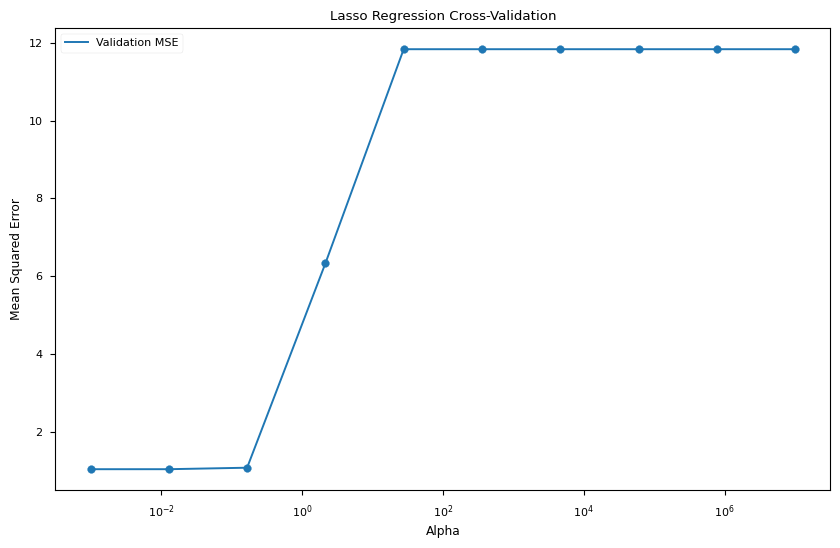

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(alphas, lasso_mse_validation)
plt.plot(alphas, lasso_mse_validation, label='Validation MSE')
plt.xscale('log')  # Set x-axis to log-scale to properly visualize the alphas
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Lasso Regression Cross-Validation')
plt.legend()
plt.show()

### Ridge

In [ ]:
ridge = RidgeCV(alphas = alphas,cv=5).fit(X_train_std,y_train)
yhat_train_ridge = ridge.predict(X_train_std)

yhat_train_ridge = ridge.predict(X_train_std)
yhat_test_ridge = ridge.predict(X_test_std)

mse_train_ridge = mean_squared_error(y_train,yhat_train_ridge)
mse_test_ridge = mean_squared_error(y_test,yhat_test_ridge)

In [ ]:
print(mse_train_ridge,mse_test_ridge)
print(cross_val_score(ridge, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

1.0208820859655487 1.0309494347191983
[-1.01191245 -1.02160635 -0.99245152 -1.01801762 -1.06421851]


In [ ]:
print(f"Best alpha: {ridge.alpha_}")

Best alpha: 27.825594022071257


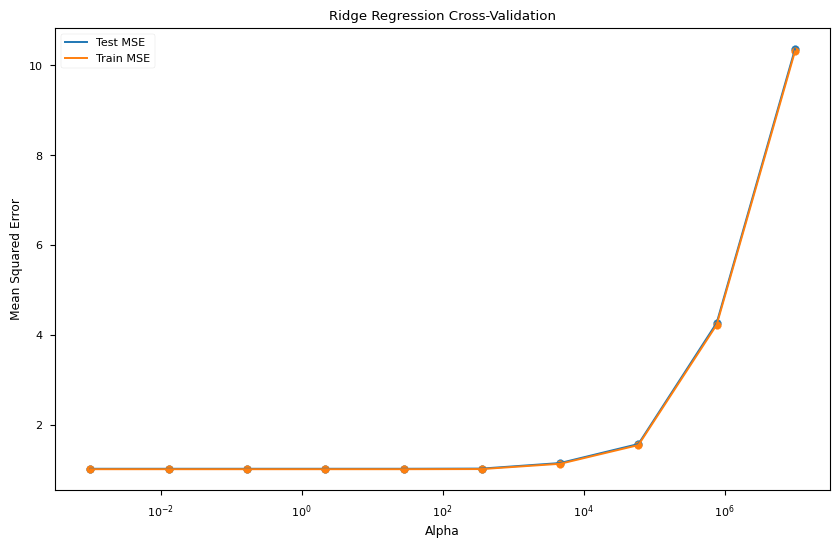

In [ ]:
ridge_mse_train = np.empty(alphas.shape[0])
ridge_mse_test = np.empty(alphas.shape[0])

for i, a in enumerate(alphas):
  model = Ridge(alpha=a)
  model.fit(X_train, y_train)
  yhat_validation = model.predict(X_test)
  yhat_train = model.predict(X_train)
  ridge_mse_test[i] = mean_squared_error(y_test, yhat_validation)
  ridge_mse_train[i] = mean_squared_error(y_train, yhat_train)


plt.figure(figsize=(10, 6))
plt.scatter(alphas, ridge_mse_test)
plt.plot(alphas, ridge_mse_test, label='Test MSE')
plt.scatter(alphas, ridge_mse_train)
plt.plot(alphas, ridge_mse_train, label='Train MSE')
plt.xscale('log')  # Set x-axis to log-scale to properly visualize the alphas
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression Cross-Validation')
plt.legend()
plt.show()

In [ ]:
ridge.coef_

array([ 0.01059566,  0.16704279,  0.56266389,  1.38101775,  0.20016379,
        0.21301655,  1.04617384, -0.00407884,  0.01622683, -0.01954761,
        0.00553326,  0.00756795, -0.00585339,  0.0026698 , -0.00294452,
        0.0044958 ])

### Elastic Net

In [ ]:
alphas = np.logspace(-3, 7, num=10)

elastic_cv = ElasticNetCV(alphas=alphas, random_state=476, cv=5)

# Fit LassoCV on the training data
elastic_cv.fit(X_train_std, y_train)

# Predict on training and test data
yhat_train_elastic = elastic_cv.predict(X_train_std)
yhat_test_elastic = elastic_cv.predict(X_test_std)

# Calculate the mean squared error on training and test sets
mse_train_elastic = mean_squared_error(y_train, yhat_train_elastic)
mse_test_elastic = mean_squared_error(y_test, yhat_test_elastic)

print(f"Best alpha: {elastic_cv.alpha_}")

print(f"Coefficients: {elastic_cv.coef_}")
print(f"MSE Train ElasticNet: {mse_train_elastic}")
print(f"MSE Test ElasticNet: {mse_test_elastic}")

Best alpha: 0.001
Coefficients: [ 0.01001937  0.16705717  0.56265557  1.38065426  0.20022478  0.21301711
  1.04604913 -0.00323685  0.00311951 -0.03447655  0.          0.
 -0.00735461  0.         -0.00488984  0.00157177]
MSE Train ElasticNet: 1.0208844779181534
MSE Test ElasticNet: 1.0309312580505972


In [ ]:
print(cross_val_score(elastic_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print(np.mean(cross_val_score(elastic_cv, X_train, y_train, cv=5, scoring='neg_mean_squared_error')))

[-1.01214359 -1.02179519 -0.99202124 -1.01816382 -1.06414924]
-1.0216546145009713


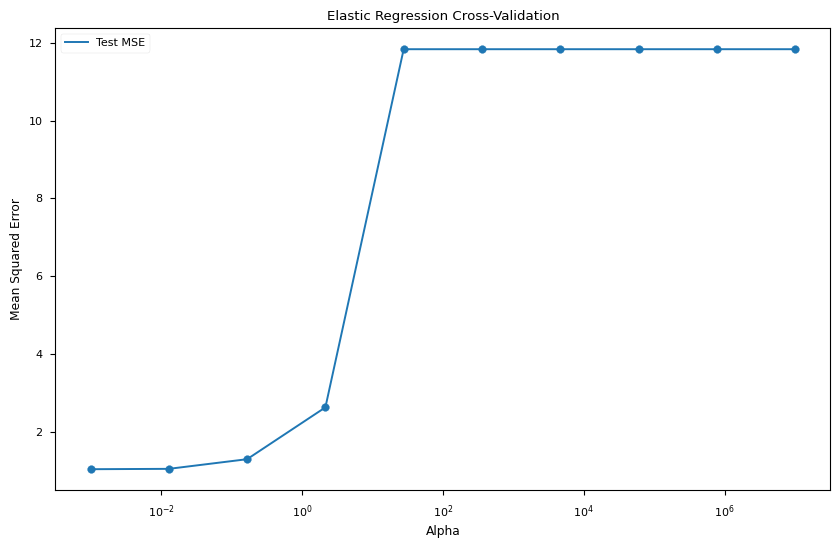

In [ ]:
elastic_mse_train = np.empty(alphas.shape[0])
elastic_mse_test = np.empty(alphas.shape[0])

for i, a in enumerate(alphas):
  model = ElasticNet(alpha=a)
  model.fit(X_train, y_train)
  yhat_validation = model.predict(X_test)
  yhat_train = model.predict(X_train)
  elastic_mse_test[i] = mean_squared_error(y_test, yhat_validation)
  elastic_mse_train[i] = mean_squared_error(y_train, yhat_train)


plt.figure(figsize=(10, 6))
plt.scatter(alphas, elastic_mse_test)
plt.plot(alphas, elastic_mse_test, label='Test MSE')
# plt.scatter(alphas, elastic_mse_train)
# plt.plot(alphas, elastic_mse_train, label='Train MSE')
plt.xscale('log')  # Set x-axis to log-scale to properly visualize the alphas
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Elastic Regression Cross-Validation')
plt.legend()
plt.show()

## KNN

In [ ]:
cv_scores = []
train_mse_scores = []
test_mse_scores = []
cv_scores_all = []

for i in range(10, 61,10):
    print(i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, y_train)

    # Calculate cross-validation scores
    scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_scores.append(scores.mean())
    cv_scores_all.append(scores)

    # Calculate train MSE
    y_train_pred = knn.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mse_scores.append(train_mse)

    # Calculate test MSE
    y_test_pred = knn.predict(X_test)  # Assuming you have X_test and y_test
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mse_scores.append(test_mse)

10
20
30
40
50
60


In [ ]:
cv_scores_all

[array([0.91400626, 0.9138839 , 0.91743719, 0.91465059, 0.91110358]),
 array([0.91693462, 0.91609333, 0.91985435, 0.91640783, 0.91415556]),
 array([0.91709534, 0.91630898, 0.91995159, 0.91724902, 0.91431638]),
 array([0.91687561, 0.91625101, 0.9200296 , 0.91684882, 0.91415815]),
 array([0.91634313, 0.91646029, 0.9197676 , 0.9166676 , 0.91374064]),
 array([0.91590719, 0.9161961 , 0.91971459, 0.91603326, 0.9131454 ])]

In [ ]:
cv_scores,test_mse_scores,train_mse_scores

([0.91421630461068,
  0.9166891379569714,
  0.9169842621688897,
  0.9168326373539525,
  0.9165958547998653,
  0.916199310780893],
 [1.0060612211311646,
  0.9842403587689946,
  0.9796163622067403,
  0.978800023314499,
  0.9793565198310386,
  0.9823643644741895],
 [0.839022985353009,
  0.8902779911130615,
  0.913934085492591,
  0.9273649301936475,
  0.9373931427944484,
  0.9466064565923652])

In [ ]:
best_k = np.argmin(test_mse_scores)

# Print the results
print("Best k:", best_k*10+10)
print("Train MSE Scores for best k:", train_mse_scores[best_k-1])
print("Test MSE Scores for best k:", test_mse_scores[best_k-1])


Best k: 40
Train MSE Scores for best k: 0.913934085492591
Test MSE Scores for best k: 0.9796163622067403


## Ensemble Methods

## Single Decision Tree

0.29865881930684063 1.4270235542042011
[-1.43514616 -1.42563298 -1.44896312 -1.44001497 -1.49674913]


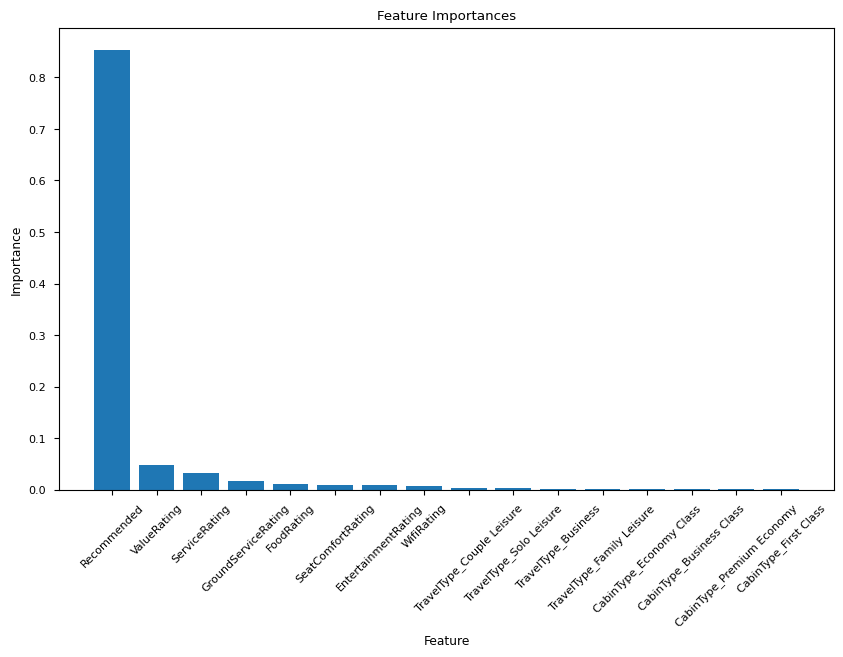

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

tree = DecisionTreeRegressor(random_state=476)
tree.fit(X_train, y_train)

y_pred_test_tree = tree.predict(X_test)
y_pred_train_tree = tree.predict(X_train)

mse_train_tree = mean_squared_error(y_train,y_pred_train_tree)
mse_test_tree = mean_squared_error(y_test,y_pred_test_tree)

print(mse_train_tree, mse_test_tree)
print(cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

#plot_tree(tree)

importances = tree.feature_importances_
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
top_features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), top_features, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()



### Random Forest

In [ ]:
rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Create GridSearchCV instance for Random Forest
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_rf = grid_search_rf.best_params_
best_estimator_rf = grid_search_rf.best_estimator_

# Make predictions on the test set
y_pred_test_rf = best_estimator_rf.predict(X_test)
y_pred_train_rf = best_estimator_rf.predict(X_train)

# Evaluate the model
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)

print(f"Best Parameters for Random Forest Regression: {best_params_rf}")
print(f"Mean Squared Error on Test Set: {mse_test_rf}")
print(f"Mean Squared Error on Train Set: {mse_train_rf}")

Best Parameters for Random Forest Regression: {'max_depth': 10, 'n_estimators': 200}
Mean Squared Error on Test Set: 0.8600404265840019
Mean Squared Error on Train Set: 0.7395880216163421


In [ ]:
print(cross_val_score(RandomForestRegressor(n_estimators=200, max_depth=10), X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print(np.mean(cross_val_score(RandomForestRegressor(n_estimators=200, max_depth=10), X_train, y_train, cv=5, scoring='neg_mean_squared_error')))

[-0.85426177 -0.86110994 -0.84443951 -0.84342645 -0.89874058]
-0.8600540929928769


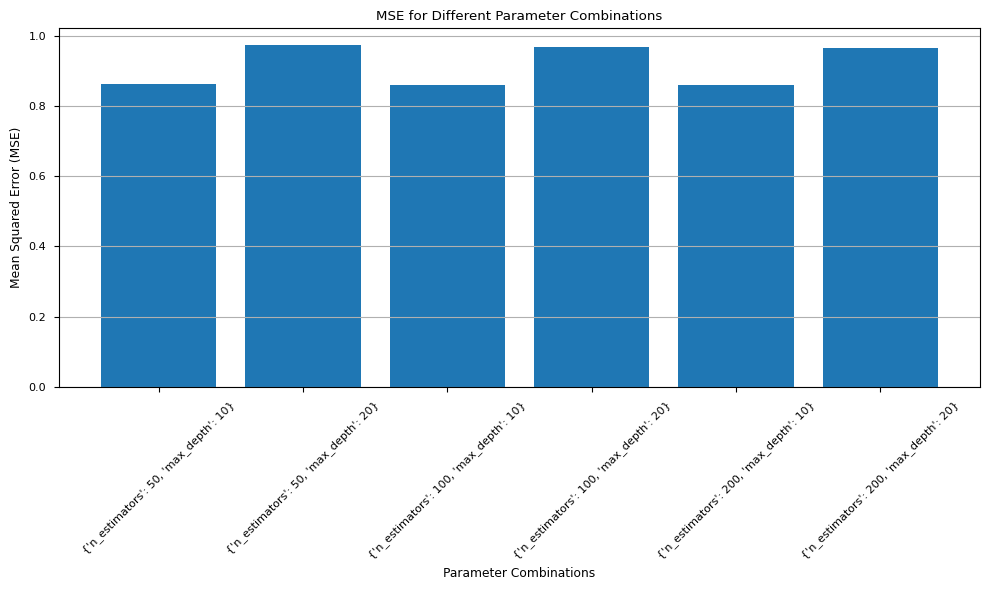

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Initialize lists to store results
mse_values = []
params_combinations = []

# Loop over parameter combinations
for n_estimator in param_grid_rf['n_estimators']:
    for max_depth in param_grid_rf['max_depth']:
        params = {'n_estimators': n_estimator, 'max_depth': max_depth}
        params_combinations.append(str(params))  # Convert params to string for labeling

        # Initialize Random Forest with current parameters
        rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=max_depth)

        # Perform cross-validation on the training set
        mse_scores = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

        # Calculate mean MSE and store it
        mse_mean = np.mean(mse_scores)
        mse_values.append(mse_mean)

# Plotting the MSE values for different parameter combinations as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(mse_values)), mse_values, align='center')
plt.xlabel('Parameter Combinations')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Parameter Combinations')
plt.xticks(ticks=np.arange(len(mse_values)), labels=params_combinations, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

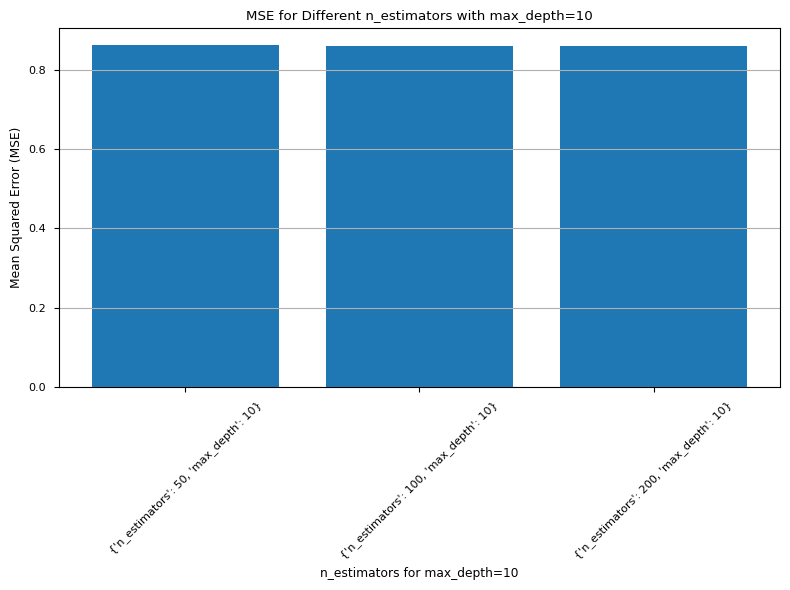

In [ ]:
# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20],
}

# Initialize lists to store results for max_depth = 10
mse_values_max_depth_10 = []
params_n_estimators = []

# Loop over n_estimators for max_depth = 10
for n_estimator in param_grid_rf['n_estimators']:
    params = {'n_estimators': n_estimator, 'max_depth': 10}
    params_n_estimators.append(str(params))  # Convert params to string for labeling

    # Initialize Random Forest with current parameters
    rf = RandomForestRegressor(n_estimators=n_estimator, max_depth=10)

    # Perform cross-validation on the training set
    mse_scores = -cross_val_score(rf, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

    # Calculate mean MSE and store it
    mse_mean = np.mean(mse_scores)
    mse_values_max_depth_10.append(mse_mean)

# Plotting the MSE values for n_estimators with max_depth = 10
plt.figure(figsize=(8, 6))
plt.bar(np.arange(len(mse_values_max_depth_10)), mse_values_max_depth_10, align='center')
plt.xlabel('n_estimators for max_depth=10')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different n_estimators with max_depth=10')
plt.xticks(ticks=np.arange(len(mse_values_max_depth_10)), labels=params_n_estimators, rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
min(mse_values_max_depth_10) # for train

0.8600250840985033

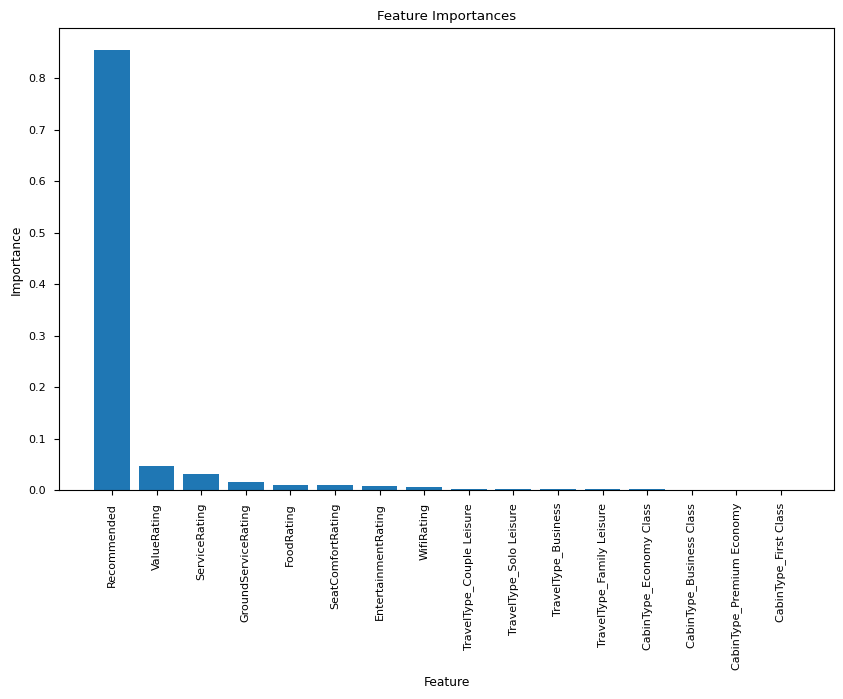

In [ ]:
indices = sorted(range(len(importances)), key=lambda i: importances[i], reverse=True)
top_features = X.columns[indices]

plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), top_features, rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

### Boosting

In [ ]:
ada_boost = AdaBoostRegressor()
param_grid_ada = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'loss': ['linear','square','exponential']
}

# Create GridSearchCV instance for AdaBoost
grid_search_ada = GridSearchCV(ada_boost, param_grid_ada, cv=5, scoring='neg_mean_squared_error')

# Fit the model to the training data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params_ada = grid_search_ada.best_params_
best_estimator_ada = grid_search_ada.best_estimator_

# Make predictions on the test set
y_pred_ada_test = best_estimator_ada.predict(X_test)
y_pred_ada_train = best_estimator_ada.predict(X_train)


# Evaluate the model
mse_ada_test = mean_squared_error(y_test, y_pred_ada_test)
mse_ada_train = mean_squared_error(y_train, y_pred_ada_train)
print(f"Best Parameters for AdaBoost Regression: {best_params_ada}")
print(f"Mean Squared Error on Test Set: {mse_ada_test}")
print(f"Mean Squared Error on Train Set: {mse_ada_train}")

print(cross_val_score(ada_boost, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))

Best Parameters for AdaBoost Regression: {'learning_rate': 0.01, 'loss': 'square', 'n_estimators': 200}
Mean Squared Error on Test Set: 1.103127384772802
Mean Squared Error on Train Set: 1.0977577215949592
[-2.03781364 -1.33341524 -1.3002141  -1.29108872 -1.30763491]


## Neural Network

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler.fit_transform(y_train.array.reshape(-1, 1)).flatten()
y_test_scaled = scaler.transform(y_test.array.reshape(-1, 1)).flatten()

def build_model(input_shape):
    tf.random.set_seed(476)
    model = models.Sequential()

    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(16, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))

    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                  metrics=['mean_squared_error'])

    return model

input_dim = X_train.shape[1]
print(input_dim)
model = build_model((input_dim,))
model.summary()

16
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 16)                272       
                                                                 
 dense_25 (Dense)            (None, 32)                544       
                                                                 
 dense_26 (Dense)            (None, 64)                2112      
                                                                 
 dense_27 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2993 (11.69 KB)
Trainable params: 2993 (11.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train_scaled,epochs=10,validation_data=(X_test,y_test_scaled))

Epoch 1/10
2279/2279 [==============================] - 12s 5ms/step - loss: 0.0208 - mean_squared_error: 0.0208 - val_loss: 0.0120 - val_mean_squared_error: 0.0120
Epoch 2/10
2279/2279 [==============================] - 9s 4ms/step - loss: 0.0114 - mean_squared_error: 0.0114 - val_loss: 0.0114 - val_mean_squared_error: 0.0114
Epoch 3/10
2279/2279 [==============================] - 10s 5ms/step - loss: 0.0112 - mean_squared_error: 0.0112 - val_loss: 0.0116 - val_mean_squared_error: 0.0116
Epoch 4/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0125 - val_mean_squared_error: 0.0125
Epoch 5/10
2279/2279 [==============================] - 9s 4ms/step - loss: 0.0109 - mean_squared_error: 0.0109 - val_loss: 0.0110 - val_mean_squared_error: 0.0110
Epoch 6/10
2279/2279 [==============================] - 10s 4ms/step - loss: 0.0108 - mean_squared_error: 0.0108 - val_loss: 0.0107 - val_mean_squared_error: 0.0107
Epoch 7/10
2

In [ ]:
preds_test = model.predict((X_test))
scaled_pred = scaler.inverse_transform(preds_test)
mean_squared_error(y_test,scaled_pred)

570/570 [==============================] - 1s 2ms/step


0.8692722602308234

In [ ]:
train_pred = model.predict(X_train)
scaled_train = scaler.inverse_transform(train_pred)
mean_squared_error(y_train,scaled_train)

2279/2279 [==============================] - 4s 2ms/step


0.8526712116360915

In [ ]:
cv_scores_nn = []

for i in range(5):
  x_train_cv,x_test_cv,y_train_cv,y_test_cv = train_test_split(X_train,y_train_scaled,test_size=0.2,random_state=i)
  input_dim = x_train_cv.shape[1]
  model= build_model((input_dim,))
  model.fit(x_train_cv,y_train_cv,epochs=10)
  yhat = model.predict(x_test_cv)
  yhat_scaled = scaler.inverse_transform(yhat)
  cv_scores_nn.append(mean_squared_error(scaler.inverse_transform(y_test_cv.reshape(-1,1)),yhat_scaled))

print(cv_scores_nn)
print(np.mean(cv_scores_nn))

Epoch 1/10
1823/1823 [==============================] - 9s 4ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 2/10
1823/1823 [==============================] - 6s 3ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 3/10
1823/1823 [==============================] - 7s 4ms/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 4/10
1823/1823 [==============================] - 6s 4ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5/10
1823/1823 [==============================] - 6s 3ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6/10
1823/1823 [==============================] - 7s 4ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 7/10
1823/1823 [==============================] - 6s 3ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 8/10
1823/1823 [==============================] - 7s 4ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 9/10
1823/1823 [==============================] - 6s 3ms/step - loss: 0.0107 - mean_squared_error:

In [ ]:
cv_scores_nn

[0.8937490761000764,
 0.8697121312857424,
 0.9155376472169346,
 0.8703109346418622,
 0.8751414973414646]